In [6]:
# libraries to import
import numpy as np
import matplotlib.pyplot as plt

# Stochastic Linear Bandits

### This is how the algorithm works :

### Steps of the algorithm

In [7]:
# values we know prior to running the algorithm
n_arms = 10
n_features = 5
true_theta = np.random.rand(n_features)
item_features = np.random.rand(n_features, n_arms)
n_rounds = 100
noise = 1.0

# confidence parameter
alpha = 1.0

# --------- Start of the algorithm LinUCB -----------



def linUCB_algorithm(n_arms, n_features, item_features, true_theta, n_rounds, noise, lambda_param, beta_param, delta_param):
    
    # Initialize feature matrix.
    # V_t[i, j] represents the sum of the product of the ith and jth feature components across all observed data points.
    # V_t[i, i] represents the sum of the squared ith feature components.
    # Initializing V_0 to lambda * Identity matrix makes it invertible.
    V_t = lambda_param * np.eye(n_features)

    # Initialize label vector.
    # Represents the sum of the product of the observed rewards with each feature component across all observed data points.
    sum_A_s_X_s = np.zeros(n_features)
    
    # Initialize theta_hat matrix, where each column represents the estimate of the true_theta vector at each round.
    theta_hat = np.zeros((n_features, n_rounds + 1))

    # Initialize arrays to store actions, rewards and regrets.
    actions = np.zeros(n_rounds + 1, dtype=int)
    rewards = np.zeros(n_rounds + 1)
    regrets = np.zeros(n_rounds + 1)
    
    print("theta at time step 0 : ")
    print(theta_hat[:, 0])

    for t in range(1, n_rounds + 1):
        
        # Compute beta parameter for this round using the given formula.
        beta_param_t = 50 # 2 * np.log(n_rounds * n_arms * lambda_param / delta_param) # 2 * np.log(t * n_arms * lambda_param / delta_param)
        print("beta param : " + str(beta_param_t))
        
        # Choose the best action based on the last theta_hat.
        max_value = -np.Inf;
        max_index = -1
        for i in range(n_arms):
            # Compute the value of each action using the given formula.
            value = theta_hat[:, t-1].T @ item_features[:, i] + np.sqrt(beta_param_t) * np.sqrt(item_features[:, i].T @ np.linalg.inv(V_t) @ item_features[:, i])
            print("Value for arm " + str(i) + " : " + str(value))
            if value >= max_value:
                max_value = value
                max_index = i
        # Update the best action to take for this round.
        actions[t] = max_index
        
        print("best action to take : " + str(actions[t]))
        
        # Observe the reward of the chosen action and add noise.
        rewards[t] = true_theta.T @ item_features[:, actions[t]] + np.random.normal(scale=noise) # this might be the reasong why we get negative regret 
        
        print("current reward of chosen action : " + str(rewards[t]))
        
        # Compute the regret for this round.
        optimal_reward = np.max(item_features.T @ true_theta) # todo put this outside the for loop
        print("optimal reward possible : " + str(optimal_reward) + " with arm " + str(np.argmax(item_features.T @ true_theta)))
        regret = optimal_reward - rewards[t]
        print("regret : " + str(regret))
        regrets[t] = regrets[t - 1] + regret
        
        # Update the feature matrix V_t by adding the outer product of the chosen action's feature vector with itself.
        V_t += item_features[:, actions[t]] @ item_features[:, actions[t]].T 
        
        # Compute the inverse of the updated feature matrix V_t.
        V_t_inv = np.linalg.inv(V_t)
        
        # Update the label vector sum_A_s_X_s by adding the outer product of the chosen action's feature vector with the observed reward.
        sum_A_s_X_s += item_features[:, actions[t]] * rewards[t]
        
        # Compute the new estimate of the true_theta vector using the updated feature matrix and label vector.
        # This estimate represents the center of the ellipsoid in the feature space.
        theta_hat[:, t] = (V_t_inv @ sum_A_s_X_s) / np.linalg.norm(V_t_inv @ sum_A_s_X_s) # todo idk if we should normalize this np.linalg.norm()    
        
        print("theta at time step " + str(t) + " : ")
        print(theta_hat[:, t])
        
        print(" -------------\n ")
        
    return actions, rewards, regrets, theta_hat[:, n_rounds]


In [8]:
accc = np.random.normal(size=(n_features, n_arms))

yolo = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25]])
yili = np.array([1, 2, 3, 4, 5])

np.dot(yolo, yili)


array([ 55, 130, 205, 280, 355])

theta at time step 0 : 
[0. 0.]
beta param : 50
Value for arm 0 : 45.76998269131859
Value for arm 1 : 74.89066624286252
Value for arm 2 : 96.29983778549733
Value for arm 3 : 135.6729094341139
Value for arm 4 : 236.73010707349215
Value for arm 5 : 59.52599596820277
Value for arm 6 : 157.88312695794235
Value for arm 7 : 71.20361915624615
Value for arm 8 : 54.951477308361426
Value for arm 9 : 119.63271232929878
best action to take : 4
current reward of chosen action : -2.138751808118105
optimal reward possible : 2.3425908657365007 with arm 3
regret : 4.481342673854606
theta at time step 1 : 
[-0.7066286   0.70758464]
 -------------
 
beta param : 50
Value for arm 0 : 38.30018970845706
Value for arm 1 : 22.067236946139325
Value for arm 2 : 29.31789573798288
Value for arm 3 : 13.873162523559749
Value for arm 4 : 128.56648303046137
Value for arm 5 : 58.568632055418966
Value for arm 6 : 159.85768765724671
Value for arm 7 : 59.15731806447665
Value for arm 8 : 8.448850711596291
Value for arm 9 

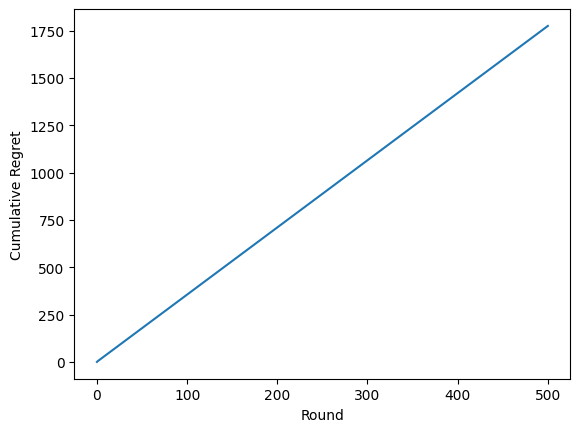

[[1.25292526]
 [0.39514671]]
[ 0.70710671 -0.70710686]


In [9]:
n_arms = 10
n_features = 2
item_features = np.random.normal(size=(n_features, n_arms))
true_theta = np.random.normal(size=(n_features, 1))
n_rounds = 500
noise = 0.0 # 0.1 -> can lead to negative regret since the reward could be the optimal + some noise
beta_param = 6
lambda_param = 0.01
delta_param = 0.1

actions, rewards, regrets, theta_hat = linUCB_algorithm(n_arms, n_features, item_features, true_theta, n_rounds, noise, lambda_param, beta_param, delta_param)

plt.plot(regrets)
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.show()

print(true_theta)
print(theta_hat / np.linalg.norm(theta_hat))

In [ ]:
# I will wrap everything in a class when I get a working algorithm

# class UCB_linear_bandit:
#     def __init__(self, true_theta, item_features, num_rounds, noise):
#         self.true_theta = true_theta
#         self.item_features = item_features
#         self.num_rounds = num_rounds
#         self.noise = noise
        
#         self.actions = np.zeros(num_rounds)
#         self.regrets = np.zeros(num_rounds)